In [ ]:
#코랩에서 구글드라이브 쓰는법

from google.colab import drive
drive.mount("/content/drive")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
names1880=pd.read_csv("../../Downloads/babynames/yob1880.txt", header=None, names=['name','gender','births'])
names1880

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [13]:
#성별 전체 출생
names1880.groupby('gender').births.sum()
names1880.pivot_table(index='gender',aggfunc=sum)

,births
gender,
F,90993
M,110493


In [3]:
years=range(1880,2011)
pieces=[]
for year in years:
    path=f"../../Downloads/babynames/yob{year}.txt"
    frame=pd.read_csv(path, header=None, names=['name','gender','births'])  
    frame['year']=year
    pieces.append(frame)

In [93]:
len(pieces)

131

In [88]:
names=pd.concat(pieces, ignore_index=True)
names

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


### 연도 및 성별로 그룹화 -> 태어난 아이 수 -> 시각화
남 여 따로 선그래프로 시각화  
x축 year, y축 태어난 아이 수 합계

Text(0, 0.5, 'babies born')

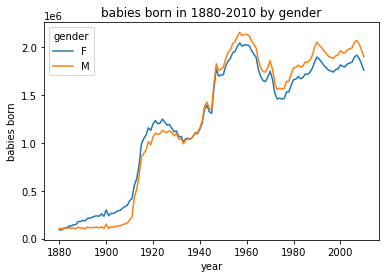

In [43]:
names_count=names.pivot_table(index='year',columns='gender',aggfunc=sum)['births']
names_count.plot()
plt.title('babies born in 1880-2010 by gender')
plt.ylabel('babies born')

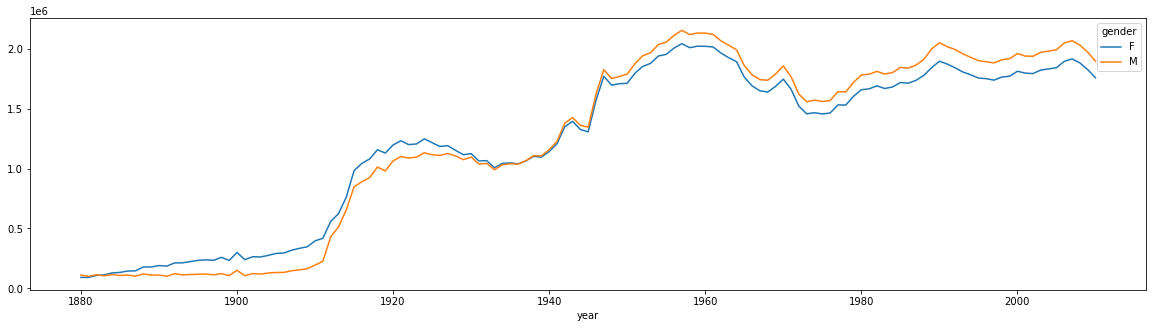

In [117]:
names_count.plot(figsize=(20,5))

### prop열 추가
각 이름의 수/해당 연도에 태어난 아이 수


In [151]:
def prop_calc(df_by_year):
    births=df_by_year['births']
    df_by_year['prop']=births/births.sum()
    return df_by_year

In [152]:
names=names.groupby(['year','gender']).apply(prop_calc)
names.groupby('year')['prop'].sum() #확인
names

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [82]:
#다른 방법:  
names['prop']=names.groupby(['year','gender']).births.apply(lambda x: x/x.sum())
names

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [89]:
#또 다른 방법:

total_births=names.groupby(['year','gender'])[['births']].sum().reset_index()
total_births.rename(columns={'births':'prop'}, inplace=True)
total_births

,year,gender,prop
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [90]:
names=names.merge(total_births, on=["year","gender"])
names['prop']=names['births']/names['prop']*100
names

,name,gender,births,year,prop
0,Mary,F,7065,1880,7.764334
1,Anna,F,2604,1880,2.861759
2,Emma,F,2003,1880,2.201268
3,Elizabeth,F,1939,1880,2.130933
4,Minnie,F,1746,1880,1.918829
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000263
1690780,Zyonne,M,5,2010,0.000263
1690781,Zyquarius,M,5,2010,0.000263
1690782,Zyran,M,5,2010,0.000263


차이점: 맨 윗방법은 함수 호출 후 prop열 재정의라 여러번 해도 같은 결과  
맨 마지막 방법은 중첩 실행할때마다 prop열을 추가해 늘어나고 결국 에러 남

## 각 연도별 성별 가장 많은 이름 top1000

In [153]:
def top1000(df):
    top_df=df.nlargest(1000,'births')
    return top_df
    
top1000_names=names.groupby(['year','gender']).apply(top1000)
top1000_names
#top1000_names.reset_index(drop=True,inplace=True)

1000개 x 131년 x 성별 2종류 는 262000개 (1000개 안되는 년 몇개 빠짐)  
reset_index(drop=으로 열로 안올리고 버려버림, inplace=결과 반영)

### 남여 따로 top5만 뽑아서 시각화

In [110]:
def top5(df):
    top_df=df.nlargest(5,'births')
    return top_df
    
top5=names.groupby(['year','gender']).apply(top5)
top5

name gender  births  year      prop
year gender                                                  
1880 F      0             Mary      F    7065  1880  7.764334
            1             Anna      F    2604  1880  2.861759
            2             Emma      F    2003  1880  2.201268
            3        Elizabeth      F    1939  1880  2.130933
            4           Minnie      F    1746  1880  1.918829
...                        ...    ...     ...   ...       ...
2010 M      1676644      Jacob      M   21875  2010  1.152297
            1676645      Ethan      M   17866  2010  0.941117
            1676646    Michael      M   17133  2010  0.902505
            1676647     Jayden      M   17030  2010  0.897080
            1676648    William      M   16870  2010  0.888651

[1310 rows x 5 columns]

In [112]:
top5.reset_index(drop=True,inplace=True)

In [113]:
boys=top5[top5.gender=='M']
girls=top5[top5.gender=='F']

In [114]:
boys

,name,gender,births,year,prop
5,John,M,9655,1880,8.738110
6,William,M,9533,1880,8.627696
7,James,M,5927,1880,5.364141
8,Charles,M,5348,1880,4.840126
9,George,M,5126,1880,4.639208
...,...,...,...,...,...
1305,Jacob,M,21875,2010,1.152297
1306,Ethan,M,17866,2010,0.941117
1307,Michael,M,17133,2010,0.902505
1308,Jayden,M,17030,2010,0.897080


In [119]:
#john, mary, harry 에 대해
#x축 year, y축 태어난 아이의 수
#선 그래프
#언제 유행했는지

name_col=names.pivot_table(index='year',columns='name',values='births',aggfunc=sum)
popular_name=name_col[['John','Mary','Harry','Sophia']]
popular_name

name,John,Mary,Harry,Sophia
year,,,,
1880,9701.0,7092.0,2158.0,138.0
1881,8795.0,6948.0,2002.0,122.0
1882,9597.0,8179.0,2246.0,179.0
1883,8934.0,8044.0,2116.0,159.0
1884,9427.0,9253.0,2338.0,170.0
...,...,...,...,...
2006,15175.0,4083.0,414.0,13506.0
2007,14427.0,3674.0,443.0,17020.0
2008,13294.0,3478.0,379.0,16054.0


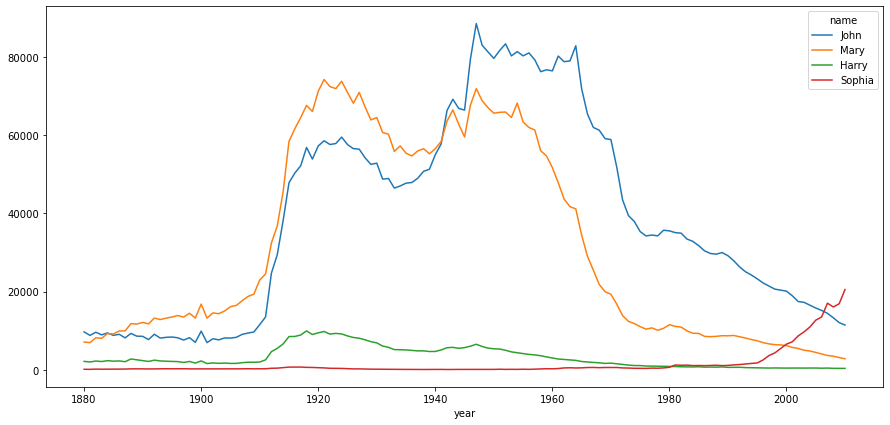

In [121]:
popular_name.plot(figsize=(15,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C6AAA7130>,
      dtype=object)

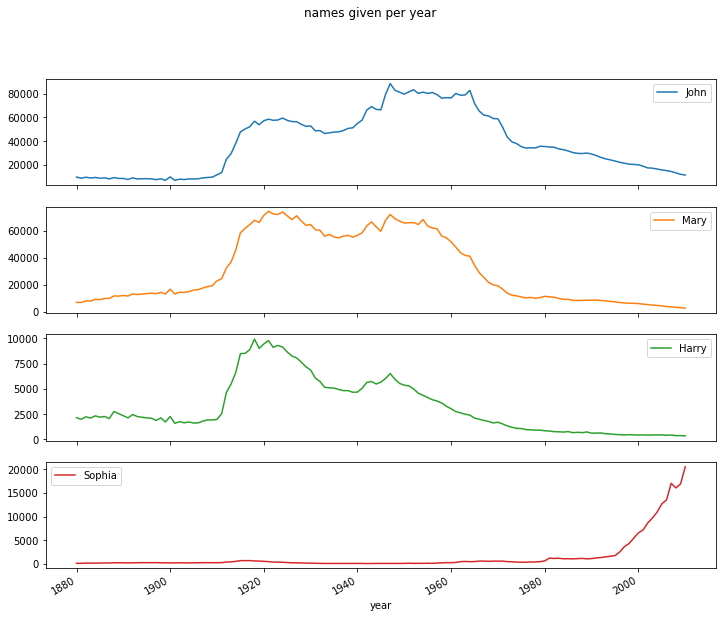

In [122]:
popular_name.plot(figsize=(12,10), subplots=True, title="names given per year")

20년 단위로 남 여 이름 1위 뽑아서 시각화

In [137]:
top_names=names.groupby(['year','gender']).head(1)
top_names=top_names[top_names['year']%20==0]
top_names

,name,gender,births,year,prop
0,Mary,F,7065,1880,7.764334
942,John,M,9655,1880,8.738110
52266,Mary,F,16710,1900,5.572359
54492,John,M,9834,1900,6.531876
169461,Mary,F,70974,1920,5.923316
175225,John,M,56911,1920,5.346427
366264,Mary,F,56203,1940,4.915939
371286,James,M,62454,1940,5.390155
572369,Mary,F,51477,1960,2.545768
579699,David,M,85917,1960,4.028767


In [138]:
top_pivot=top_names.pivot_table(index='name',columns='year',values='births')
top_pivot

year,1880,1900,1920,1940,1960,1980,2000
name,,,,,,,
David,NaN,NaN,NaN,NaN,85917.0,NaN,NaN
Emily,NaN,NaN,NaN,NaN,NaN,NaN,25949.0
Jacob,NaN,NaN,NaN,NaN,NaN,NaN,34454.0
James,NaN,NaN,NaN,62454.0,NaN,NaN,NaN
Jennifer,NaN,NaN,NaN,NaN,NaN,58375.0,NaN
John,9655.0,9834.0,56911.0,NaN,NaN,NaN,NaN
Mary,7065.0,16710.0,70974.0,56203.0,51477.0,NaN,NaN
Michael,NaN,NaN,NaN,NaN,NaN,68619.0,NaN


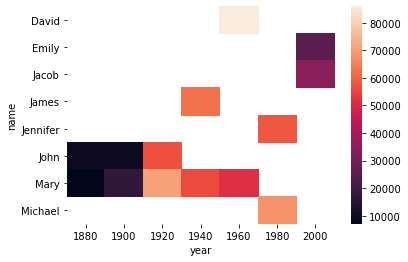

In [140]:
sns.heatmap(top_pivot, cmap='')

In [76]:
#이름의 다양성 변화 분석
#파이차트? 비율 분석

#1880년 여자아이들 이름 종류 :942
#2010년 여자아이들 이름 종류 :19689
#x축 year y축 이름의 종류 수, 선그래프 성별로

In [151]:
name_variety=names.groupby(['year','gender'])['births'].count().unstack()
name_variety

gender,F,M
year,,
1880,942,1058
1881,938,997
1882,1028,1099
1883,1054,1030
1884,1172,1125
...,...,...
2006,20028,14011
2007,20520,14363
2008,20416,14590


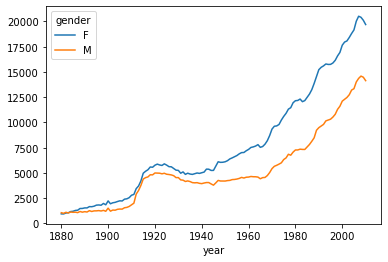

In [152]:
name_variety.plot()

<Figure size 1800x216 with 0 Axes>

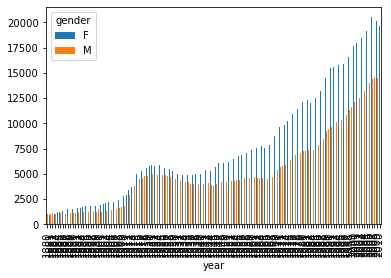

In [169]:
plt.figure(figsize=(25,3))
name_variety.plot.bar()

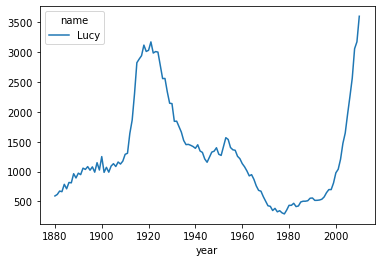

In [161]:
name_col[['Lucy']].plot()

- 이름의 첫번째 글자

In [207]:


names['first_letters']=names['name'].apply(lambda x: x[0])
#성별 선호도
first_name_by_gender=names.pivot_table(index='first_letters',
                                       columns='gender',values='births',aggfunc=sum)
first_name_by_gender

gender,F,M
first_letters,,
A,14807000,10437642
B,8109527,7390473
C,12036173,11695155
D,9468764,13698477
E,8813908,6477138
F,1987948,2938923
G,3799892,6199985
H,3871071,3691530
I,1707370,1115470


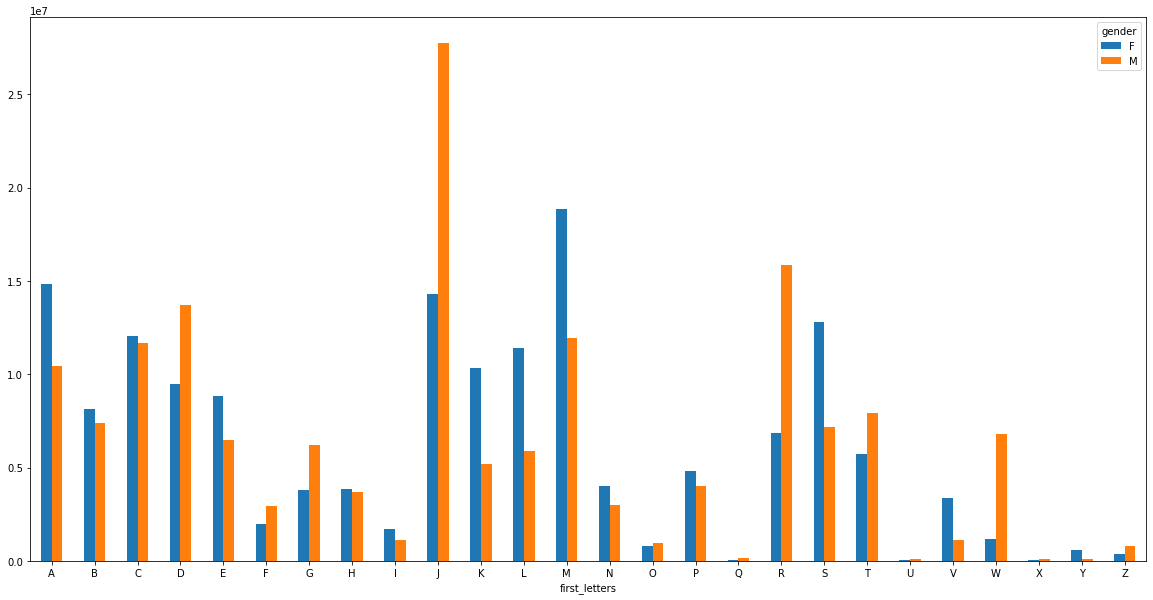

In [237]:
fig, axes=plt.subplots(figsize=(20,10))
first_name_by_gender.plot(kind='bar',rot=0, ax=axes)

In [212]:
#연도에 따라 남녀 따로 비교

first_letter_base=names.pivot_table(index='first_letters',columns=['year','gender'],values='births')
first_letter_base.head()

year                 1880                    1881                    1882  \
gender                  F           M           F           M           F   
first_letters                                                               
A              104.876404   73.326733  101.129032   72.126316  114.593750   
B              121.062500   34.672131  114.657143   34.362069  117.658537   
C               81.500000  125.936709   83.250000  117.493506   79.679012   
D               52.809524   56.545455   57.475000   51.619048   53.270833   
E              127.155556   81.105882  133.431818   78.373494  151.329670   

year                             1883                    1884              \
gender                  M           F           M           F           M   
first_letters                                                               
A               75.621359  108.710280   72.717172  115.860870   75.740000   
B               34.545455  126.682927   32.169231  130.543478   31.918919   
C              143.816901   87.910256  126.324675   94.273810  127.703704   
D               53.500000   55.285714   52.818182   53.684211   55.534884   
E               80.408602  150.510417   82.226190  158.317308   80.297872   

year           ...        2006                    2007              \
gender         ...           F           M           F           M   
first_letters  ...                                                   
A              ...  113.014011  169.399397  112.561492  162.169308   
B              ...  101.751926  183.445763   98.098837  181.833333   
C              ...   99.559813  230.851995   96.635369  231.125475   
D              ...   58.389610  127.801879   57.305395  126.988085   
E              ...  157.554545  197.587084  159.926024  191.315399   

year                 2008                    2009                    2010  \
gender                  F           M           F           M           F   
first_letters                                                               
A              107.765367  159.680636  105.937396  150.742327  102.723291   
B               97.211078  185.432566   96.895894  172.315047   93.572886   
C              100.159735  226.124688   97.791587  219.397294   99.058342   
D               56.284169  115.602151   52.965377  116.491150   50.601286   
E              148.401998  191.627778  140.649460  192.044693  136.894009   

year                       
gender                  M  
first_letters              
A              145.692308  
B              164.832827  
C              222.398943  
D              111.581900  
E              194.153409  

[5 rows x 262 columns]

In [241]:
year_comparison=first_letter_base.loc[:,([1910,2010])]
year_comparison=year_comparison.swaplevel('year','gender',1)
year_comparison

gender,F,M,F,M
year,1910,1910,2010,2010
first_letters,,,,
A,121.277580,79.911950,102.723291,145.692308
B,150.149123,38.616071,93.572886,164.832827
C,82.004484,105.548611,99.058342,222.398943
D,121.075000,63.265060,50.601286,111.581900
E,202.585903,97.838235,136.894009,194.153409
F,166.204545,148.688525,76.142077,89.950000
G,153.301887,99.287356,137.562674,189.883436
H,261.959459,115.414414,109.407925,106.058309


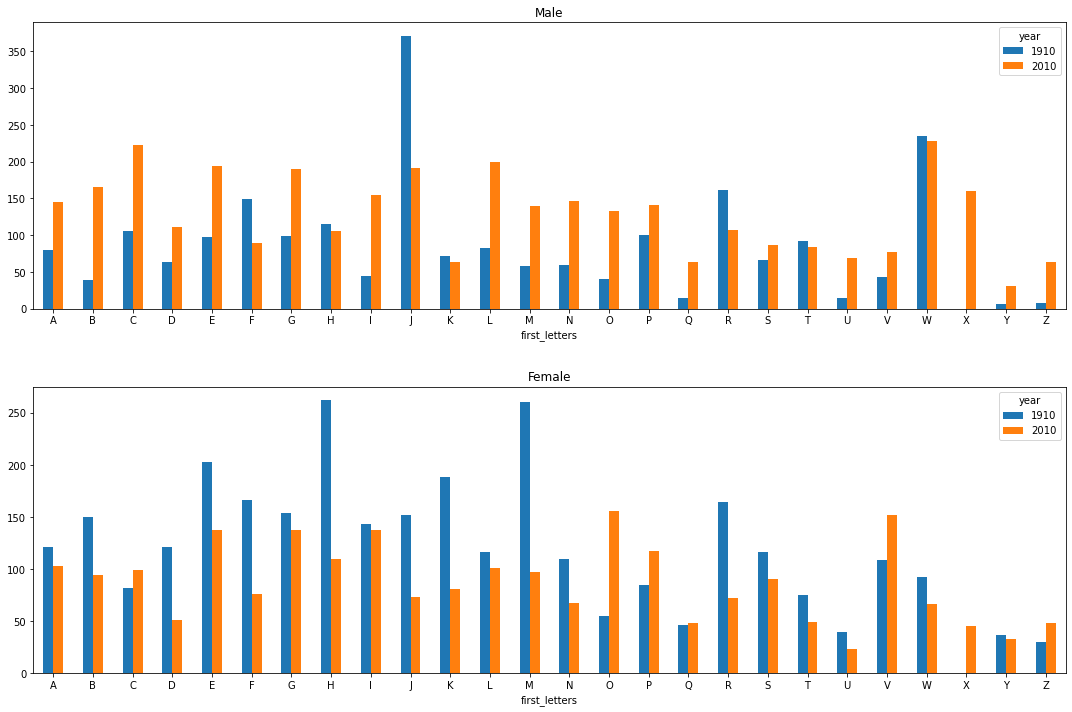

In [258]:
fig, axes=plt.subplots(2,1,figsize=(15,10))
year_comparison['M'].plot.bar(ax=axes[0], rot=0, title='Male')
year_comparison['F'].plot.bar(ax=axes[1], rot=0, title='Female')
plt.tight_layout(h_pad=3)

In [ ]:
sns.barplot(x='first_letters',y='gender',data=first_name_by_gender)

- 이름의 마지막 글자

In [178]:
last_letters=names.name.map(lambda x: x[-1])
last_letters.name='last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [206]:
last_letter_table=names.pivot_table('births',index=last_letters, 
                  columns=['gender','year'], aggfunc=sum)
last_letter_table.head()

gender             F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

gender                                  ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   

gender                                                                   \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   

gender                 
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  

[5 rows x 262 columns]

In [183]:
subtable=last_name_table.reindex(columns=[1910,1960,2010], level='year')
subtable

gender              F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [188]:
#비율
last_letter_prop=subtable/subtable.sum()

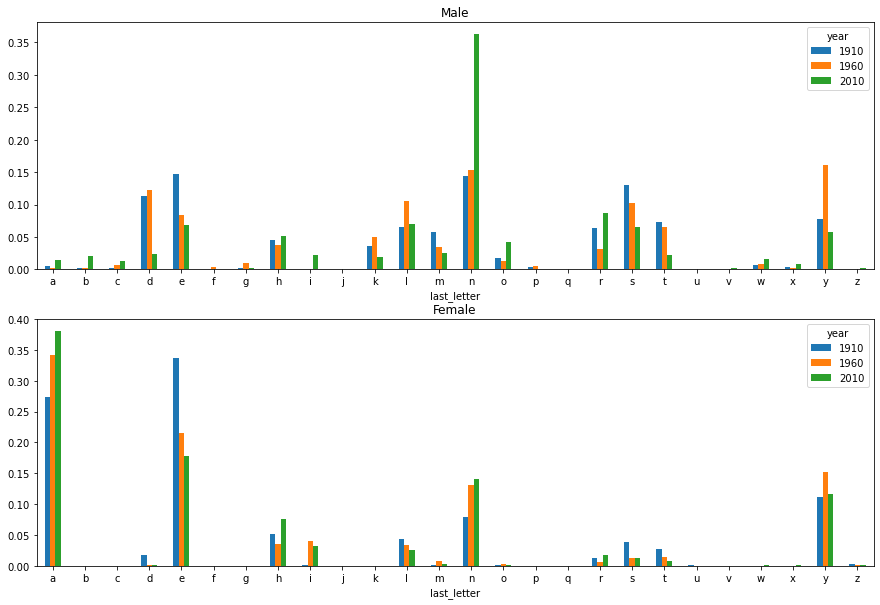

In [201]:
fig, axes=plt.subplots(2,1,figsize=(15,10))
last_letter_prop['M'].plot.bar(ax=axes[0],rot=0, title='Male')
last_letter_prop['F'].plot.bar(ax=axes[1],rot=0, title='Female')

- 남자이름 끝 글자 d,n,y에 대해서만 연도별 

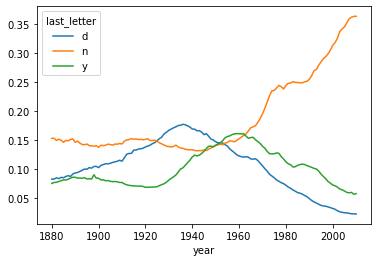

In [211]:
last_letter_prop=last_letter_table/last_letter_table.sum()
last_letter_prop.loc[['d','n','y'],'M'].T.plot()

## 시대별로 특정 이름이 차지하는 비율
- 특정 이름이 흔한지 여부 확인  
- 이름의 상대 순위 구하기  
- 각 연도별 가장 인기 있는 이름 알아보기
- 가장 많이 증가하거나 감소한 이름
- 모음, 자음, 길이, 철자변화, 첫글자와 끝글자 등 이름 유행 분석
유명인의 이름, 인구 통계학적 변화

## 이름의 다양성
1. 연도별/성별 prop 합계 -> 1에 가까울 수록 이름이 흔하다

In [155]:
top1000_prop=top1000_names.pivot_table(values='prop', index='year', columns='gender', aggfunc=sum)

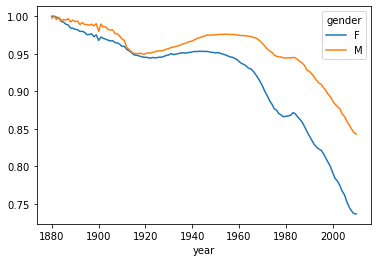

In [156]:
top1000_prop.plot()

2. 상위 50% 이름 종류
prop 더해서 0.5가 되는 지점의 이름이 몇개인지

- 2010년 남자아이 이름 중 상위 50%에 해당하는 이름 종류 개수

In [165]:
boys=names[names.gender=='M']
df=boys[boys.year==2010]
in2010=df.sort_values(by='prop', ascending=False).prop.cumsum()
in2010.values.searchsorted(0.5) #116

#in2010.values.searchsorted(0.5)+1 => 이름 종류의 개수

#prop.cumsum.values.searchsorted(0.5) #prop 더해서 0.5 되는 인덱스

116

top1000에 대해 그룹화해서 한꺼번에 종류 개수 정리해서 시각화

In [170]:
def get_quantile_count(group, q=0.5):
    temp=group.sort_values(by='prop', ascending=False).prop.cumsum()
    return temp.values.searchsorted(q)+1 

diversity=top1000_names.groupby(['year','gender']).apply(get_quantile_count)
diversity=diversity.unstack()
diversity

gender,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


Text(0, 0.5, 'kind of names')

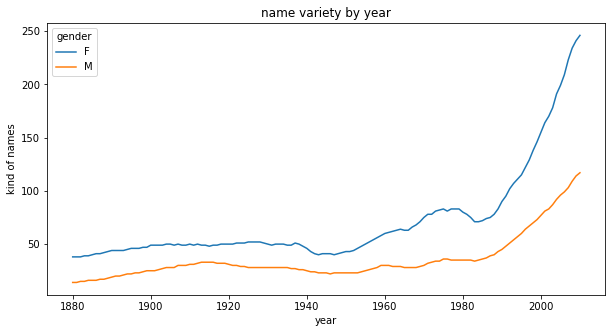

In [175]:
diversity.plot(figsize=(10,5))
plt.title('name variety by year')
plt.ylabel('kind of names')

uni-sex 이름에 대한 성별에 따른 경향 출력  
Jaden,
Kennedy,
Reagan,
Madison,
Leslie

In [227]:
subtable=names.pivot_table('prop',index='year',columns=['gender','name'],aggfunc=sum)
#subtable.loc[:,['Jaden','Kennedy','Reagan','Madison','Leslie']]
uni_sex=subtable.reindex(columns=['Jaden','Kennedy','Reagan','Madison','Leslie'],level='name')
uni_sex

gender         F                                                 M            \
name       Jaden   Kennedy    Reagan   Madison    Leslie     Jaden   Kennedy   
year                                                                           
1880         NaN       NaN       NaN       NaN  0.000088       NaN       NaN   
1881         NaN       NaN       NaN       NaN  0.000120       NaN       NaN   
1882         NaN       NaN       NaN       NaN  0.000083       NaN       NaN   
1883         NaN       NaN       NaN       NaN  0.000062       NaN       NaN   
1884         NaN       NaN       NaN       NaN  0.000116       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
2006    0.000572  0.001528  0.001179  0.009807  0.001600  0.002407  0.000087   
2007    0.000517  0.001592  0.001178  0.009347  0.001403  0.003015  0.000074   
2008    0.000357  0.001563  0.001265  0.009017  0.001233  0.002544  0.000082   
2009    0.000304  0.001560  0.001384  0.008306  0.001081  0.002099  0.000076   
2010    0.000203  0.001594  0.001400  0.007430  0.000886  0.002354  0.000082   

gender                                
name      Reagan   Madison    Leslie  
year                                  
1880         NaN  0.000199  0.000715  
1881         NaN  0.000278  0.000913  
1882         NaN  0.000237  0.001073  
1883         NaN  0.000210  0.001147  
1884         NaN  0.000175  0.001092  
...          ...       ...       ...  
2006    0.000127  0.000033  0.000040  
2007    0.000119  0.000033  0.000040  
2008    0.000100  0.000028  0.000037  
2009    0.000106  0.000028  0.000039  
2010    0.000105  0.000017  0.000025  

[131 rows x 10 columns]

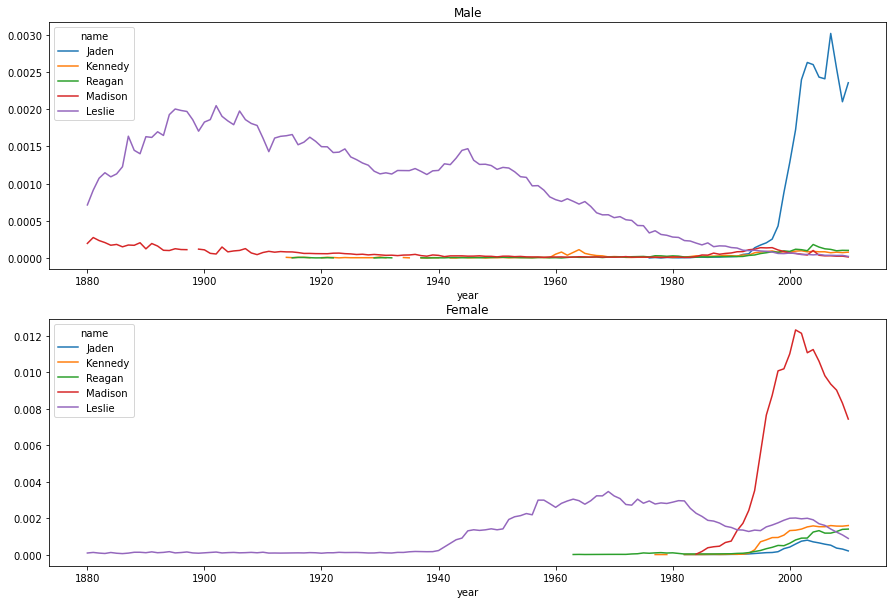

In [232]:
fig, axes= plt.subplots(2,1,figsize=(15,10))
uni_sex['M'].plot(ax=axes[0], title='Male')
uni_sex['F'].plot(ax=axes[1], title='Female')

Michael 이름의 유행시기

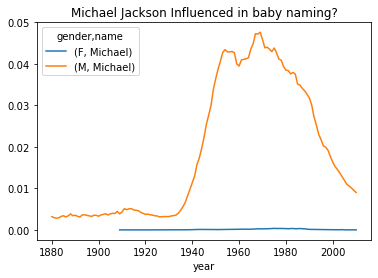

In [237]:
michael_jackson=subtable.reindex(columns=['Michael'],level='name')
michael_jackson.plot(title='Michael Jackson Influenced in baby naming?')

마이클 잭슨이 활발했던 70년대에 피크 찍고 2000년대에는 줄어들었다

연도별/성별 이름의 길이 변화

In [265]:
names['length']=names['name'].apply(len)
names.head()

,name,gender,births,year,prop,length
0,Mary,F,7065,1880,0.077643,4
1,Anna,F,2604,1880,0.028618,4
2,Emma,F,2003,1880,0.022013,4
3,Elizabeth,F,1939,1880,0.021309,9
4,Minnie,F,1746,1880,0.019188,6


In [276]:
name_length=names.pivot_table('births',index='length',columns=['gender','year'], aggfunc=sum)
name_length=name_length/name_length.sum()
name_length

gender         F                                                              \
year        1880      1881      1882      1883      1884      1885      1886   
length                                                                         
2            NaN  0.000054       NaN  0.000080  0.000054  0.000083  0.000138   
3       0.053059  0.053309  0.052433  0.053453  0.052968  0.052331  0.053052   
4       0.260657  0.260138  0.257874  0.253744  0.255772  0.255283  0.254148   
5       0.266977  0.268414  0.269900  0.271665  0.271537  0.273652  0.270157   
6       0.233809  0.236496  0.236975  0.238244  0.236000  0.235360  0.235350   
7       0.071610  0.070393  0.071302  0.071429  0.072701  0.072819  0.076679   
8       0.059191  0.058453  0.058618  0.057887  0.058239  0.058434  0.058739   
9       0.052696  0.050536  0.050394  0.051085  0.050224  0.049551  0.049129   
10      0.002000  0.002208  0.002503  0.002359  0.002503  0.002488  0.002567   
11           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
12           NaN       NaN       NaN  0.000053       NaN       NaN  0.000042   
13           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15           NaN       NaN       NaN       NaN       NaN       NaN       NaN   

gender                                ...         M                      \
year        1887      1888      1889  ...      2001      2002      2003   
length                                ...                                 
2       0.000082  0.000067  0.000107  ...  0.001080  0.001327  0.001528   
3       0.052862  0.051587  0.051180  ...  0.013156  0.013731  0.014133   
4       0.251858  0.249240  0.248681  ...  0.140766  0.140128  0.141225   
5       0.272765  0.276956  0.277044  ...  0.264533  0.268736  0.273907   
6       0.233027  0.231270  0.230460  ...  0.277884  0.279702  0.280440   
7       0.076276  0.078833  0.079308  ...  0.192485  0.188769  0.183927   
8       0.060891  0.060118  0.061636  ...  0.059221  0.057537  0.056644   
9       0.048985  0.048653  0.047873  ...  0.035321  0.035219  0.033944   
10      0.003254  0.003247  0.003711  ...  0.002557  0.002509  0.002595   
11           NaN  0.000028       NaN  ...  0.012765  0.012109  0.011419   
12           NaN       NaN       NaN  ...  0.000161  0.000137  0.000152   
13           NaN       NaN       NaN  ...  0.000043  0.000067  0.000059   
14           NaN       NaN       NaN  ...  0.000018  0.000017  0.000022   
15           NaN       NaN       NaN  ...  0.000010  0.000014  0.000006   

gender                                                                        
year        2004      2005      2006      2007      2008      2009      2010  
length                                                                        
2       0.001651  0.001839  0.001446  0.001341  0.001257  0.001380  0.001231  
3       0.014689  0.014984  0.015054  0.015110  0.016196  0.017573  0.018876  
4       0.141106  0.140299  0.138603  0.136550  0.134263  0.134895  0.134843  
5       0.276156  0.277516  0.278632  0.281432  0.281814  0.279186  0.277342  
6       0.282828  0.283916  0.285792  0.288220  0.292427  0.295625  0.298281  
7       0.179630  0.177235  0.176097  0.174267  0.173004  0.171361  0.170703  
8       0.056356  0.056600  0.056345  0.055922  0.055117  0.055095  0.055502  
9       0.033925  0.034352  0.034537  0.033523  0.033147  0.032692  0.031838  
10      0.002606  0.002559  0.002823  0.002780  0.002773  0.002725  0.002732  
11      0.010806  0.010457  0.010462  0.010607  0.009773  0.009261  0.008418  
12      0.000150  0.000152  0.000119  0.000145  0.000154  0.000140  0.000130  
13      0.000066  0.000048  0.000063  0.000066  0.000052  0.000049  0.000072  
14      0.000024  0.000026  0.000016  0.000026  0.000018  0.000018  0.000022  
15      0.000005  0.000018  0.000011  0.000011  0.000004       NaN  0.000009  

[14 rows x 262 colu

In [280]:
name_length_in=name_length.reindex(columns=[1910,1960,2010], level='year')
name_length_in

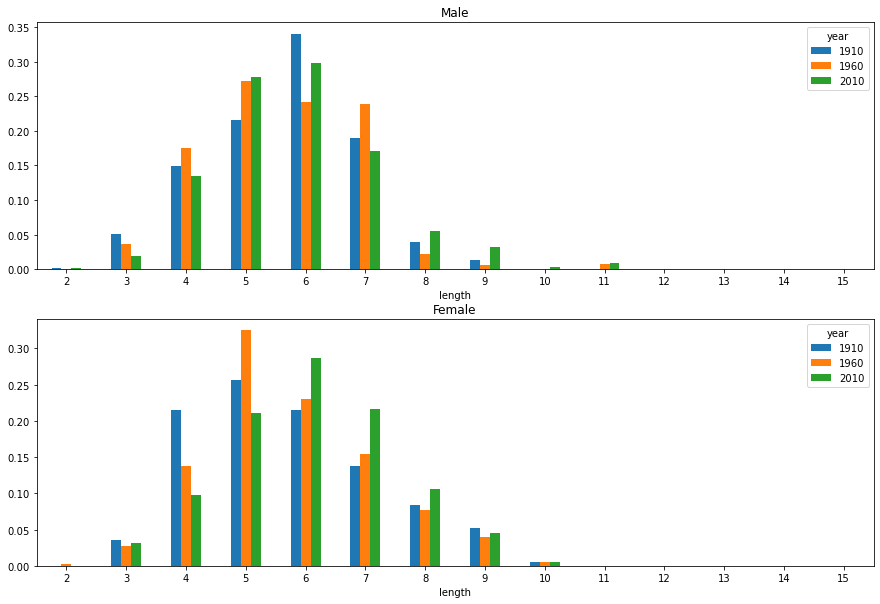

In [281]:
fig, axes=plt.subplots(2,1,figsize=(15,10))
name_length_in['M'].plot.bar(ax=axes[0],rot=0, title='Male')
name_length_in['F'].plot.bar(ax=axes[1],rot=0, title='Female')